In [3]:
import pandas as pd
import seaborn as sns
import zipfile
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('archive/phishing_email.csv')

'''
zip_file = zipfile.ZipFile('archive.zip')
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}
'''

"\nzip_file = zipfile.ZipFile('archive.zip')\ndfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))\n       for text_file in zip_file.infolist()\n       if text_file.filename.endswith('.csv')}\n"

In [21]:
'''
frames = []
for i,j in dfs.items():
    if ('Enron.csv' or 'Ling.csv') not in i:
        frames.append(j)

df = pd.concat(frames)
'''

In [9]:
df

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0
...,...,...
82481,info advantageapartmentscom infoadvantageapart...,1
82482,monkeyorg helpdeskmonkeyorg monkeyorg hi josep...,1
82483,help center infohelpcentercoza_infohelpcenterc...,1
82484,metamask infosofamekarcom verify metamask wall...,1


In [10]:
df.head()

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0


In [11]:
df.describe()

,label
count,82486.000000
mean,0.519979
std,0.499604
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [12]:
df.duplicated().sum()

408

In [13]:
df.isnull().sum()

text_combined    0
label            0
dtype: int64

In [5]:
df.shape

(82486, 2)

In [6]:
df.dropna(inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df[df['label']==1].value_counts().sum()

42845

In [17]:
df[df['label']==0].value_counts().sum()

39233

In [43]:
emails = df['text_combined'].astype(str)
email_all = " ".join(emails)

In [44]:
email_all_cloud = WordCloud().generate(email_all)

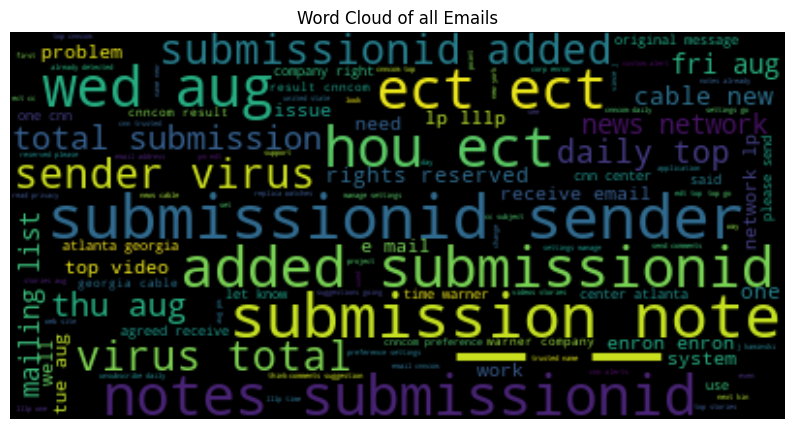

In [45]:
plt.figure(figsize=(10, 8))
plt.imshow(email_all_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of all Emails')
plt.show()

In [46]:
spam_emails = df[df['label']==1]['text_combined'].astype(str)
spam_emails_all = " ".join(spam_emails)

In [47]:
spam_emails_all_cloud = WordCloud().generate(spam_emails_all)

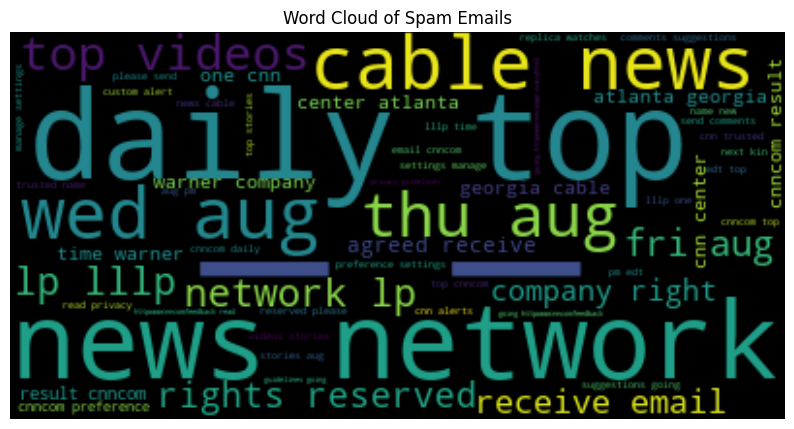

In [48]:
plt.figure(figsize=(10, 8))
plt.imshow(spam_emails_all_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Spam Emails')
plt.show()

In [49]:
clean_emails = df[df['label']==0]['text_combined'].astype(str)
clean_emails_all = " ".join(clean_emails)

In [50]:
clean_emails_all_cloud = WordCloud().generate(clean_emails_all)

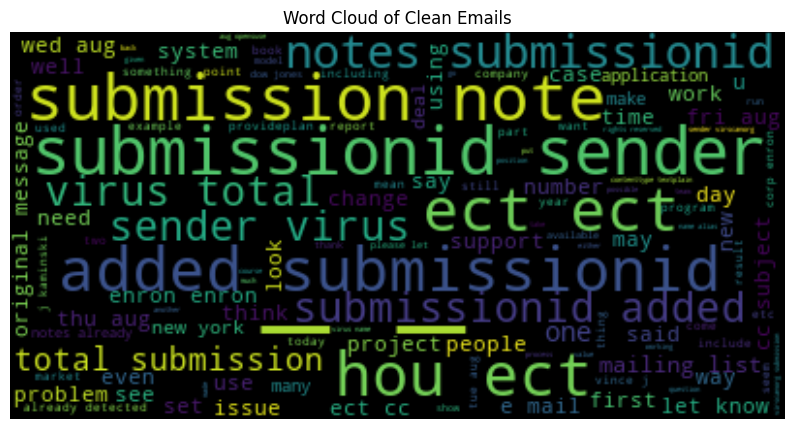

In [51]:
plt.figure(figsize=(10, 8))
plt.imshow(clean_emails_all_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Clean Emails')
plt.show()

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def text_preprocess(ds: pd.Series) -> pd.Series:
    ds = ds.str.lower()
    ds = ds.str.replace(r'[^\w\s]', '')
    ds = ds.str.split()
    ds = ds.apply(lambda x: [word for word in x if word not in stopwords.words('english')])
    lemmatizer = WordNetLemmatizer()
    ds = ds.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    ds = ds.str.join(' ')
    return ds   

df['text_combined'] = text_preprocess(df['text_combined'])
df.to_csv('processed_text.csv', index=False)

KeyboardInterrupt: 